<a href="https://colab.research.google.com/github/Vedarham/XLearnings01/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split

## Feature Engineering

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakeshrau/social-network-ads")
print(os.listdir(path))


100%|██████████| 3.27k/3.27k [00:00<00:00, 4.67MB/s]

Extracting files...
['Social_Network_Ads.csv']


In [ ]:
ads = pd.read_csv(os.path.join(path,'Social_Network_Ads.csv'))

In [ ]:
ads.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
298,15675791,Male,45,79000,0
290,15586757,Male,39,134000,1
79,15655123,Female,26,17000,0
176,15609653,Female,35,47000,0
117,15591433,Male,36,52000,0


In [ ]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
ads.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ads.drop(['User ID','Purchased','Gender'], axis=1), ads['Purchased'], test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

## Standarization

#### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler.mean_

array([3.75750000e+01, 7.05892857e+04])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

We fit only training data which calculates `mean and standard deviation` of Training set, transform performs the operation, on both train and test using the same fitted scaler

i.e.
```
x_test_scaled​= ​x_test ​− μ_train​​/ σ_train
```



In [ ]:
X_train_scaled

,Age,EstimatedSalary
0,-0.842522,0.130156
1,0.041758,0.277702
2,0.729530,-1.315791
3,1.613809,1.103957
4,0.827784,-1.404318
...,...,...
275,-1.333788,-1.286281
276,-1.137281,-1.050209
277,0.533024,1.841685
278,0.140011,0.189175


In [ ]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70589.3
std,10.2,33948.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


#### Effect on Scaling

Text(0.5, 1.0, 'After Scaling')

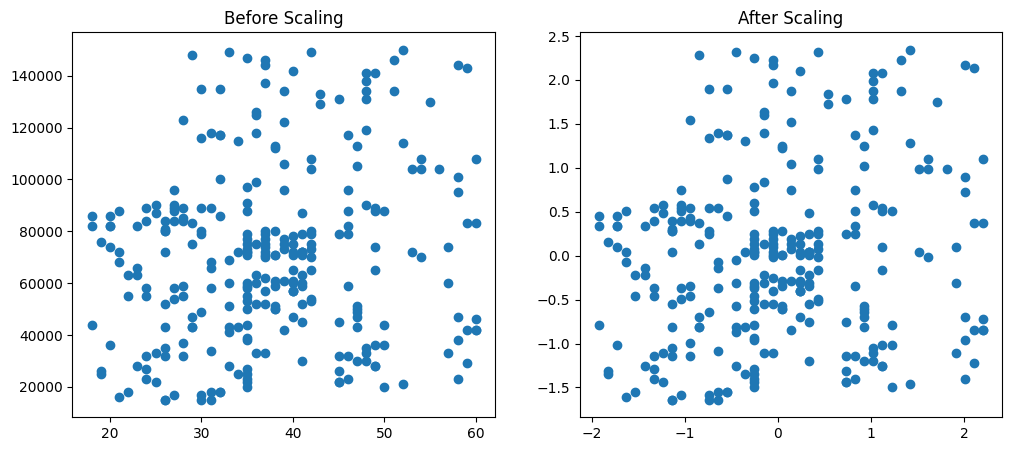

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols =2 , figsize= (12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'])
ax2.set_title('After Scaling')

/tmp/ipython-input-3089126331.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-3089126331.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


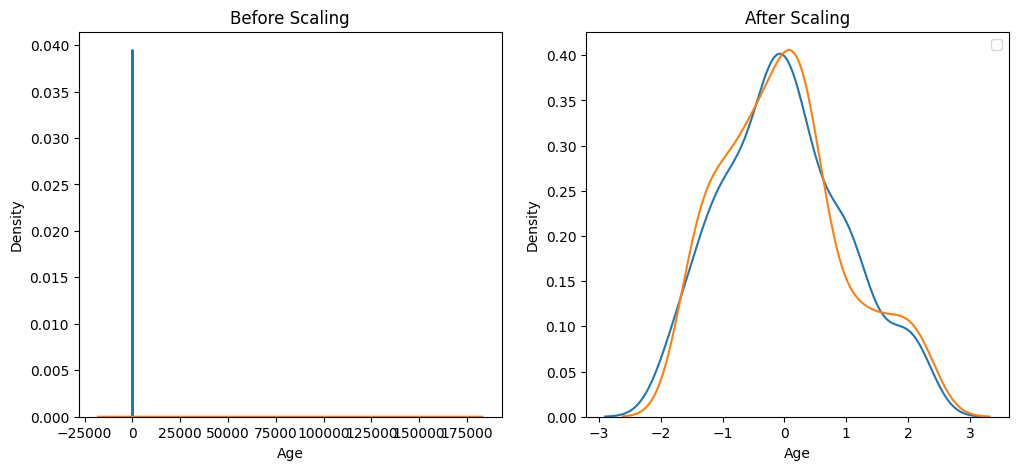

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols =2 , figsize= (12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
plt.legend()

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.legend()

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

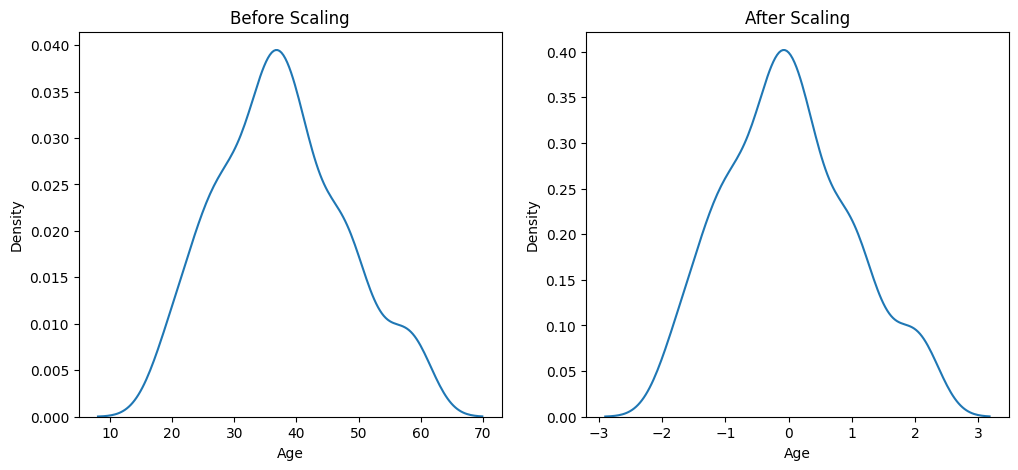

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols =2 , figsize= (12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax = ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)

<Axes: title={'center': 'After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

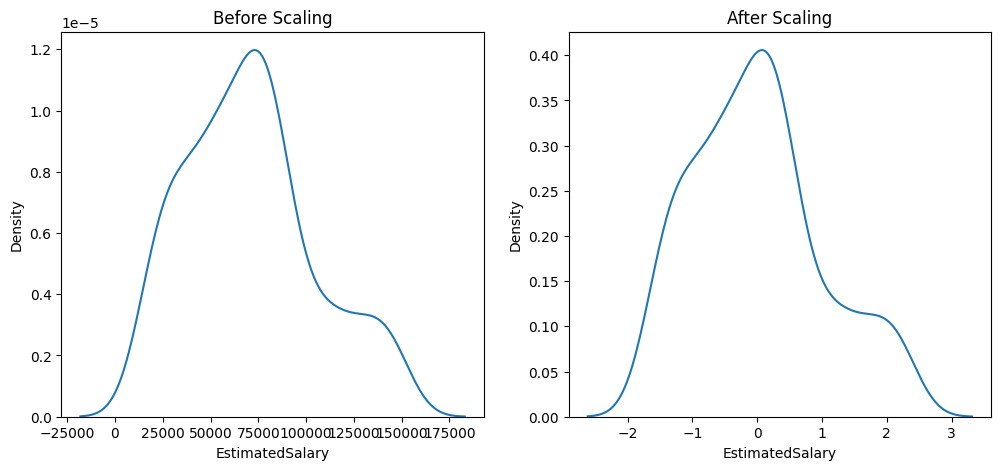

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols =2 , figsize= (12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

### Why Scaling is Important

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
print('Non Scaled', accuracy_score(y_test,y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Non Scaled 0.85
Scaled 0.85


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [ ]:
print('Non Scaled', accuracy_score(y_test,y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Non Scaled 0.8666666666666667
Scaled 0.85


## Normalization


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tawfikelmetwally/wine-dataset")
os.listdir(path)

Using Colab cache for faster access to the 'wine-dataset' dataset.


['Wine dataset.csv']

In [ ]:
wine = pd.read_csv(os.path.join(path,'Wine dataset.csv'), skiprows=1, header=None, usecols=[0,1,2])
wine.columns = ['Class','Alcohol','MalicAcid']
wine['Alcohol'] = pd.to_numeric(wine['Alcohol'], errors='coerce')
wine['MalicAcid'] = pd.to_numeric(wine['MalicAcid'], errors='coerce')
wine.dropna(inplace=True)


In [ ]:
wine.sample(5)

,Class,Alcohol,MalicAcid
173,3,13.71,5.65
176,3,13.17,2.59
85,2,12.67,0.98
42,1,13.88,1.89
66,2,13.11,1.01


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Class      178 non-null    int64  
 1   Alcohol    178 non-null    float64
 2   MalicAcid  178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


<Axes: xlabel='Alcohol', ylabel='Density'>

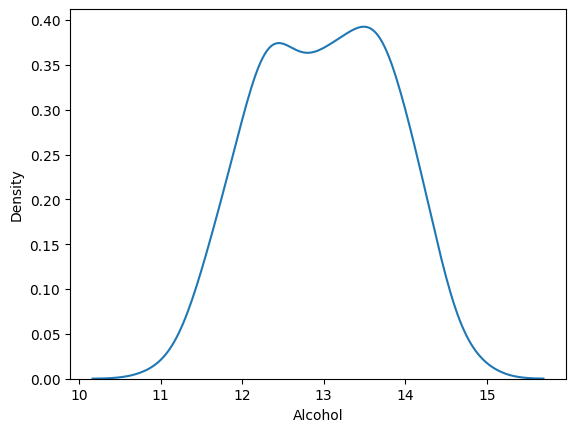

In [ ]:
sns.kdeplot(wine['Alcohol'])

<Axes: xlabel='MalicAcid', ylabel='Density'>

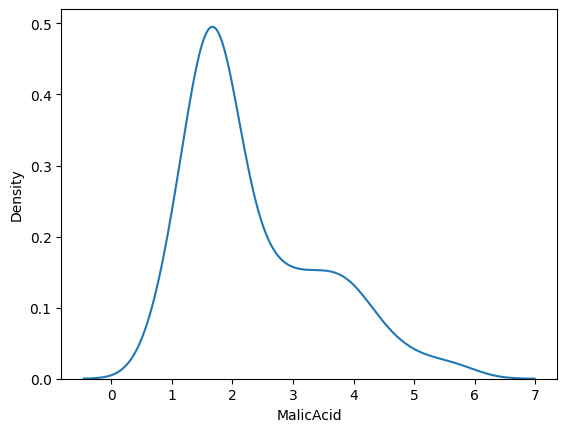

In [ ]:
sns.kdeplot(wine['MalicAcid'])

<Axes: xlabel='Alcohol', ylabel='MalicAcid'>

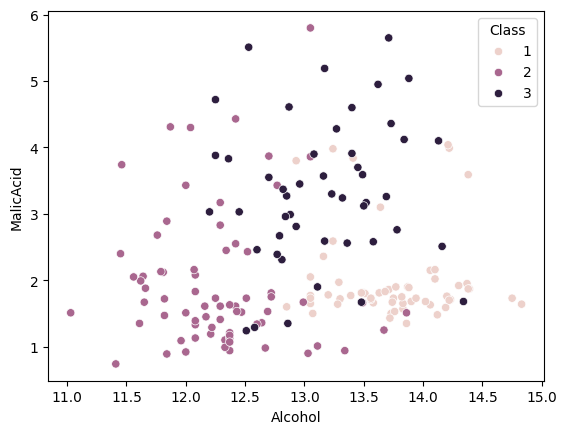

In [ ]:
sns.scatterplot(x=wine['Alcohol'], y=wine['MalicAcid'], hue = wine['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(wine.drop('Class',axis=1),wine['Class'],test_size = 0.3, random_state =42)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = X_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

,Alcohol,MalicAcid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.3,1.6
50%,12.9,1.9
75%,13.7,3.2
max,14.8,5.8


In [ ]:
np.round(x_train_scaled.describe(), 1)

,Alcohol,MalicAcid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


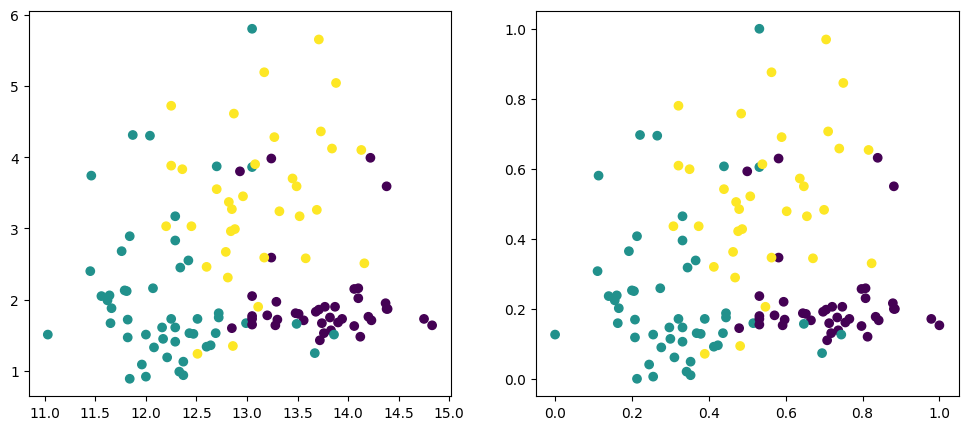

In [ ]:
fig , (ax1,ax2) = plt.subplots(ncols =2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'], X_train['MalicAcid'], c = Y_train)

ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['MalicAcid'], c = Y_train)

<Axes: xlabel='Alcohol', ylabel='Density'>

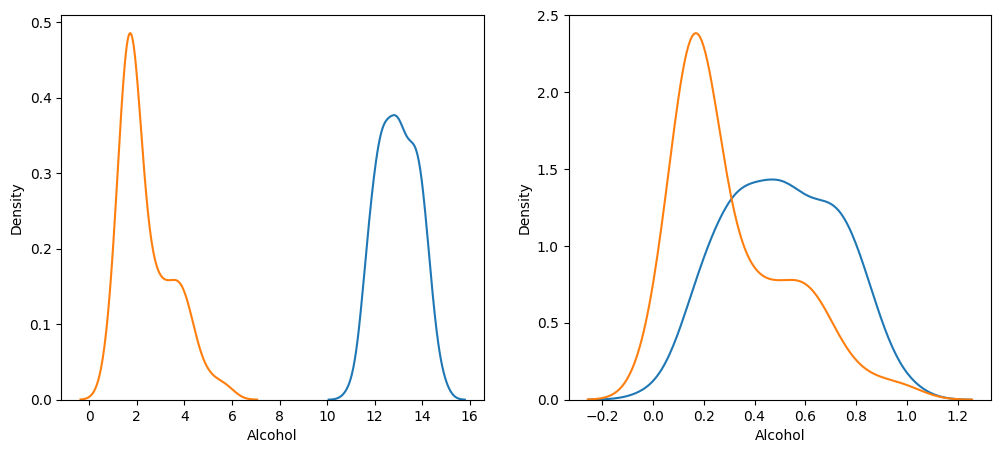

In [ ]:
fig , (ax1,ax2) = plt.subplots(ncols =2, figsize=(12,5))

sns.kdeplot(X_train['Alcohol'], ax = ax1)
sns.kdeplot(X_train['MalicAcid'], ax = ax1)

sns.kdeplot(x_train_scaled['Alcohol'], ax= ax2)
sns.kdeplot(x_train_scaled['MalicAcid'], ax= ax2)

#### Mean Normalization

In [ ]:
from sklearn.preprocessing import FunctionTransformer
mean_norm = FunctionTransformer(
    lambda x: (x - x.mean(axis = 0))/ (x.max(axis = 0) - x.min(axis = 0))
)
x_train_norm = mean_norm.fit_transform(X_train)

In [ ]:
x_train_norm = pd.DataFrame(x_train_norm, columns = X_train.columns)

In [ ]:
np.round(x_train_norm.describe(),1)

,Alcohol,MalicAcid
count,124.0,124.0
mean,-0.0,0.0
std,0.2,0.2
min,-0.5,-0.3
25%,-0.2,-0.2
50%,-0.0,-0.1
75%,0.2,0.2
max,0.5,0.7


<Axes: xlabel='Alcohol', ylabel='MalicAcid'>

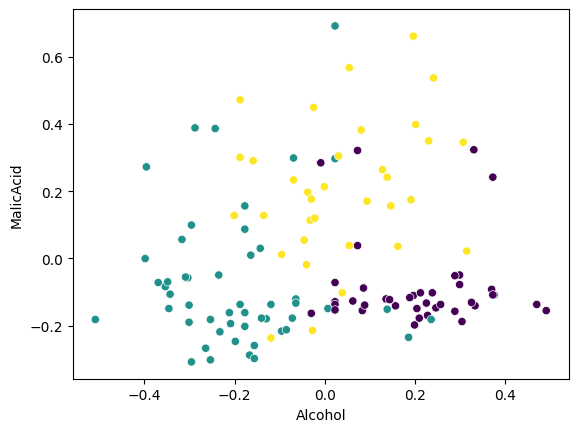

In [ ]:
sns.scatterplot(x=x_train_norm['Alcohol'],y=x_train_norm['MalicAcid'], c=Y_train)

  #### Max Absolute Scaling

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler().fit(X_train)
x_train_scaler = scaler.transform(X_train)
x_test_scaler = scaler.transform(X_test)

In [ ]:
x_train_scaler = pd.DataFrame(x_train_scaler, columns = X_train.columns)

In [ ]:
x_train_scaler.describe()

,Alcohol,MalicAcid
count,124.000000,124.000000
mean,0.874127,0.414308
std,0.056742,0.190055
min,0.743763,0.153448
25%,0.828726,0.282759
50%,0.872893,0.327586
75%,0.923466,0.546552
max,1.000000,1.000000


<Axes: xlabel='Alcohol', ylabel='MalicAcid'>

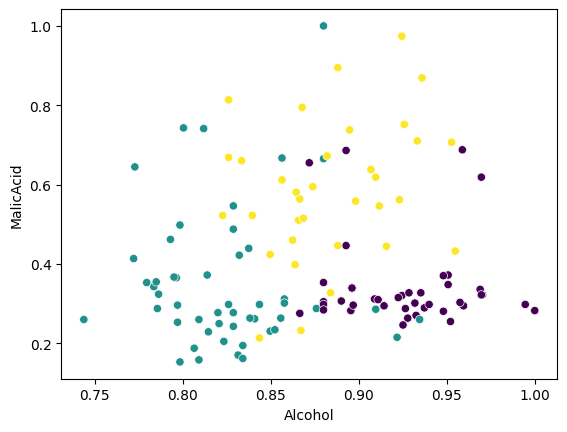

In [ ]:
sns.scatterplot(x=x_train_scaler['Alcohol'],y=x_train_scaler['MalicAcid'], c=Y_train)

#### Robust Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler().fit(X_train)
x_train_robust = robustscaler.transform(X_train)

In [ ]:
x_train_robust = pd.DataFrame(x_train_robust, columns= X_train.columns)

In [ ]:
np.round(x_train_robust.describe(),1)

,Alcohol,MalicAcid
count,124.0,124.0
mean,0.0,0.3
std,0.6,0.7
min,-1.4,-0.7
25%,-0.5,-0.2
50%,0.0,0.0
75%,0.5,0.8
max,1.3,2.5


<Axes: xlabel='Alcohol', ylabel='MalicAcid'>

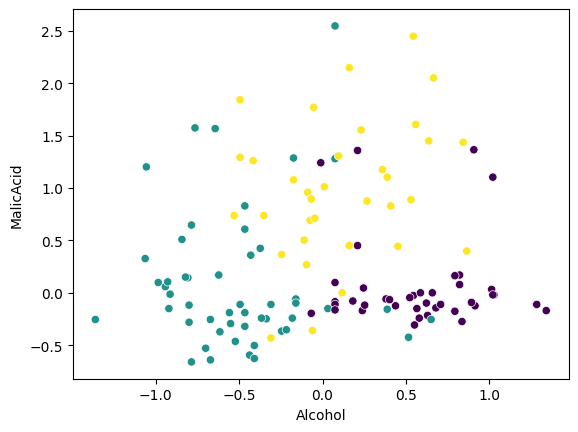

In [ ]:
sns.scatterplot(x=x_train_robust['Alcohol'],y=x_train_robust['MalicAcid'], c=Y_train)

<Axes: xlabel='MalicAcid', ylabel='Density'>

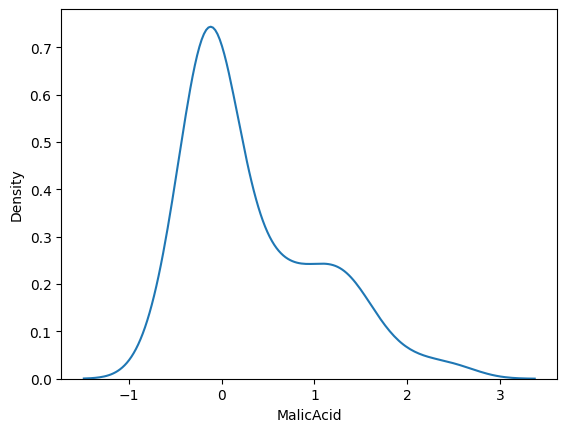

In [ ]:
sns.kdeplot(x_train_robust['MalicAcid'])

## Feature Transformation

### Ordinal Encoding

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aimack/customer")

print("Path to dataset files:", path)
print(os.listdir(path))

100%|██████████| 471/471 [00:00<00:00, 1.17MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aimack/customer/versions/1
['customer.csv']


In [ ]:
df = pd.read_csv(os.path.join(path,'customer.csv'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        50 non-null     int64 
 1   gender     50 non-null     object
 2   review     50 non-null     object
 3   education  50 non-null     object
 4   purchased  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [ ]:
df.sample(5)

,age,gender,review,education,purchased
49,25,Female,Good,UG,No
1,68,Female,Poor,UG,No
39,76,Male,Poor,PG,No
9,74,Male,Good,UG,Yes
47,38,Female,Good,PG,Yes


In [ ]:
df = df.iloc[:,2:]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df.iloc[:,-1], test_size =0.2 )

In [ ]:
x_train.shape, x_test.shape

((40, 2), (10, 2))

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories = [['Poor','Average','Good'],['School','UG','PG']])

In [ ]:
oe.fit(x_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [ ]:
x_train = oe.transform(x_train)

In [ ]:
x_test = oe.transform(x_test)

In [ ]:
x_train

array([[0., 0.],
       [0., 2.],
       [1., 1.],
       [2., 1.],
       [2., 0.],
       [2., 0.],
       [0., 2.],
       [0., 2.],
       [1., 0.],
       [0., 0.],
       [2., 1.],
       [2., 0.],
       [0., 2.],
       [2., 1.],
       [0., 2.],
       [0., 2.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [2., 0.],
       [2., 1.],
       [2., 2.],
       [0., 1.],
       [2., 0.],
       [0., 2.],
       [0., 1.],
       [1., 1.],
       [2., 1.],
       [1., 2.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.]])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le= LabelEncoder()

In [ ]:
le.fit(y_train)

LabelEncoder()

In [ ]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
y_train

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

### One Hot Encoding

In [ ]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdulmalik1518/cars-datasets-2025")

print("Path to dataset files:", path)
print(os.listdir(path))



Using Colab cache for faster access to the 'cars-datasets-2025' dataset.
Path to dataset files: /kaggle/input/cars-datasets-2025
['Cars Datasets 2025.csv']


In [ ]:
df = pd.read_csv('/kaggle/input/cars-datasets-2025/Cars Datasets 2025.csv',encoding='latin1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [ ]:
df['Fuel Types'].value_counts()

,count
Fuel Types,
Petrol,871
Diesel,106
Electric,97
Hybrid,79
Petrol/Diesel,16
Petrol/Hybrid,16
Plug-in Hybrid,5
Hybrid (Petrol),4
Diesel/Petrol,4


In [ ]:
df['Company Names'].value_counts()

,count
Company Names,
Nissan,149
Volkswagen,109
Porsche,96
Mazda,87
Mitsubishi,60
GMC,59
Chevrolet,58
Peugeot,54
Kia,54


###### Using Pandas

In [ ]:
pd.get_dummies(df, columns = ['Fuel Types','Company Names'])

,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Seats,Torque,Fuel Types_CNG/Petrol,...,Company Names_Porsche,Company Names_ROLLS ROYCE,Company Names_ROLLS ROYCE,Company Names_TOYOTA,Company Names_Tata Motors,Company Names_Tesla,Company Names_Toyota,Company Names_VOLVO,Company Names_Volkswagen,Company Names_Volvo
0,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",2,800 Nm,False,...,False,False,False,False,False,False,False,False,False,False
1,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",5,900 Nm,False,...,False,True,False,False,False,False,False,False,False,False
2,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",5,100 - 140 Nm,False,...,False,False,False,False,False,False,False,False,False,False
3,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",4,900 Nm,False,...,False,False,False,False,False,False,False,False,False,False
4,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",2,560 Nm,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590  $48,000",5,239 Nm,False,...,False,False,False,False,False,False,True,False,False,False
1214,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",7,630 Nm,False,...,False,False,False,False,False,False,True,False,False,False
1215,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169  196 hp,190 km/h,8.0  9.2 sec,"$25,210  $29,135",5,190  210 Nm,False,...,False,False,False,False,False,False,True,False,False,False
1216,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140  198 hp,180 km/h,7.9  10.5 sec," 33,000",5,190  205 Nm,False,...,False,False,False,False,False,False,True,False,False,False


###### N-1 One Hot Encoding

In [ ]:
pd.get_dummies(df, columns = ['Fuel Types','Company Names'], drop_first= True)

,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Seats,Torque,Fuel Types_Diesel,...,Company Names_Porsche,Company Names_ROLLS ROYCE,Company Names_ROLLS ROYCE,Company Names_TOYOTA,Company Names_Tata Motors,Company Names_Tesla,Company Names_Toyota,Company Names_VOLVO,Company Names_Volkswagen,Company Names_Volvo
0,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",2,800 Nm,False,...,False,False,False,False,False,False,False,False,False,False
1,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",5,900 Nm,False,...,False,True,False,False,False,False,False,False,False,False
2,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",5,100 - 140 Nm,False,...,False,False,False,False,False,False,False,False,False,False
3,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",4,900 Nm,False,...,False,False,False,False,False,False,False,False,False,False
4,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",2,560 Nm,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590  $48,000",5,239 Nm,False,...,False,False,False,False,False,False,True,False,False,False
1214,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",7,630 Nm,False,...,False,False,False,False,False,False,True,False,False,False
1215,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169  196 hp,190 km/h,8.0  9.2 sec,"$25,210  $29,135",5,190  210 Nm,False,...,False,False,False,False,False,False,True,False,False,False
1216,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140  198 hp,180 km/h,7.9  10.5 sec," 33,000",5,190  205 Nm,False,...,False,False,False,False,False,False,True,False,False,False


###### Using Sklearn

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:10],df.iloc[:,-1],test_size =0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(drop='first',sparse_output=False, dtype=np.int32, handle_unknown='ignore')

In [ ]:
x_train.sample(5)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats
679,Jeep,Grand Cherokee 4xe,2.0L Turbo PHEV,17.3 kWh,375 hp,210 km/h,6.0 sec,"$59,865",Hybrid,5
1212,Mazda,787B (Race Car),2.6L Wankel Rotary Engine,"2,620 cc",700 hp,320 km/h,3.5 sec,"$5,000,000 - $7,000,000",Petrol,1
635,Tata Motors,Nano GenX,624cc MPFI,624 cc,37 hp,105 km/h,29 sec,"$4,000",Petrol,4
85,MERCEDES,BENZ CLS 450,V6,"2,996 cc",362 hp,250 km/h,5.2 sec,"$70,000",Petrol,5
904,Jaguar Land Rover,Jaguar I-PACE,Electric (Dual Motor),90 kWh (Battery),400 hp,200 km/h,4.8 sec,"$70,000",Electric,5


In [ ]:
x_train_ohe = ohe.fit_transform(x_train[['Fuel Types','Company Names']])

x_train_ohe

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int32)

In [ ]:
x_test_ohe = ohe.transform(x_test[['Fuel Types','Company Names']])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
x_train_ohe.shape

(974, 53)

In [ ]:
np.hstack((x_train[['Company Names','HorsePower']].values, x_train_ohe)).shape

(974, 55)

###### Group Multiple Columns under a threshold and Apply OneHotEncoding

In [ ]:
counts = df['Company Names'].value_counts()
threshold =100

In [ ]:
rept = counts[counts <= threshold].index

In [ ]:
rept

Index(['Porsche', 'Mazda', 'Mitsubishi', 'GMC', 'Chevrolet', 'Peugeot', 'Kia',
       'Ford', 'TOYOTA', 'BMW', 'Jaguar Land Rover', 'Tata Motors',
       'ROLLS ROYCE', 'Acura', 'LAMBORGHINI', 'HYUNDAI', 'MERCEDES', 'AUDI',
       'Cadillac', 'Jeep', 'KIA', 'ASTON MARTIN', 'Tesla', 'NISSAN', 'Bugatti',
       'FERRARI', 'Volvo', 'HONDA', 'Toyota', 'MARUTI SUZUKI', 'VOLVO',
       'MAHINDRA', 'KIA  ', 'BENTLEY', 'ROLLS ROYCE '],
      dtype='object', name='Company Names')

In [ ]:
pd.get_dummies(df['Company Names'].replace(rept,'uncommon')).sample(5)

,Nissan,Volkswagen,uncommon
752,False,False,True
658,False,False,True
1168,False,False,True
1032,False,False,True
116,False,False,True


### Column Transformer

In [ ]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("aibuzz/covid-toy-dataset")
print(os.listdir(path))
print("Path to dataset files:", path)

100%|██████████| 787/787 [00:00<00:00, 1.54MB/s]

Extracting files...
['covid_toy.csv']
Path to dataset files: /root/.cache/kagglehub/datasets/aibuzz/covid-toy-dataset/versions/1


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv(os.path.join(path,'covid_toy.csv'))

In [ ]:
df.sample(5)

,age,gender,fever,cough,city,has_covid
37,55,Male,100.0,Mild,Kolkata,No
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
79,48,Female,103.0,Mild,Kolkata,Yes
45,72,Male,99.0,Mild,Bangalore,No


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df.describe()

,age,fever
count,100.000000,90.000000
mean,44.220000,100.844444
std,24.878931,2.054926
min,5.000000,98.000000
25%,20.000000,99.000000
50%,45.000000,101.000000
75%,66.500000,102.750000
max,84.000000,104.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   gender     100 non-null    object 
 2   fever      90 non-null     float64
 3   cough      100 non-null    object 
 4   city       100 non-null    object 
 5   has_covid  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df.isnull().sum()

,0
age,0
gender,0
fever,10
cough,0
city,0
has_covid,0


#### Without using Column Transformer

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(df.drop(columns=['has_covid']), df['has_covid'], test_size =0.2)

In [ ]:
si = SimpleImputer()

X_train_fever = si.fit_transform(X_train[['fever']])

X_test_fever = si.transform(X_test[['fever']])

In [ ]:
X_train_fever
# mean value is filled

array([[100.65277778],
       [101.        ],
       [104.        ],
       [100.        ],
       [100.        ],
       [100.        ],
       [101.        ],
       [101.        ],
       [100.        ],
       [100.65277778],
       [101.        ],
       [ 98.        ],
       [101.        ],
       [101.        ],
       [ 99.        ],
       [100.65277778],
       [100.65277778],
       [104.        ],
       [ 98.        ],
       [104.        ],
       [103.        ],
       [101.        ],
       [104.        ],
       [ 99.        ],
       [101.        ],
       [103.        ],
       [103.        ],
       [ 99.        ],
       [101.        ],
       [104.        ],
       [104.        ],
       [100.65277778],
       [ 99.        ],
       [100.65277778],
       [104.        ],
       [ 99.        ],
       [ 98.        ],
       [104.        ],
       [101.        ],
       [100.        ],
       [ 99.        ],
       [ 98.        ],
       [ 98.        ],
       [102

In [ ]:
oe = OrdinalEncoder(categories = [['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])
X_test_cough = oe.transform(X_test[['cough']])

In [ ]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype = np.int32 )
X_train_gender = ohe.fit_transform(X_train[['gender']])
X_test_gender = ohe.transform(X_test[['gender']])

X_train_city = ohe.fit_transform(X_train[['city']])
X_test_city = ohe.transform(X_test[['city']])

In [ ]:
X_train_age = X_train.drop(columns = ['gender','fever','cough','city']).values
X_test_age  = X_test.drop(columns = ['gender','fever','cough','city']).values

X_train_age.shape

(80, 1)

In [ ]:
X_train_transformed = np.concatenate((X_train_age,X_train_city,X_train_cough,X_train_gender),axis =1)

In [ ]:
X_train_transformed

array([[75.,  1.,  0.,  0.,  0.,  0.],
       [14.,  0.,  0.,  0.,  1.,  1.],
       [51.,  0.,  0.,  0.,  0.,  1.],
       [10.,  0.,  0.,  0.,  0.,  1.],
       [27.,  1.,  0.,  0.,  0.,  1.],
       [27.,  0.,  1.,  0.,  0.,  1.],
       [15.,  1.,  0.,  0.,  0.,  1.],
       [68.,  1.,  0.,  0.,  1.,  0.],
       [11.,  0.,  0.,  0.,  0.,  1.],
       [20.,  0.,  0.,  1.,  1.,  0.],
       [81.,  0.,  0.,  1.,  0.,  0.],
       [73.,  0.,  0.,  0.,  0.,  1.],
       [51.,  0.,  1.,  0.,  1.,  0.],
       [38.,  0.,  0.,  0.,  0.,  0.],
       [72.,  0.,  0.,  0.,  0.,  1.],
       [34.,  0.,  0.,  1.,  1.,  0.],
       [42.,  0.,  0.,  0.,  1.,  0.],
       [42.,  0.,  0.,  1.,  0.,  1.],
       [ 5.,  0.,  0.,  1.,  1.,  0.],
       [54.,  0.,  1.,  0.,  1.,  0.],
       [48.,  0.,  1.,  0.,  0.,  0.],
       [65.,  0.,  0.,  1.,  0.,  0.],
       [34.,  1.,  0.,  0.,  1.,  0.],
       [49.,  0.,  0.,  0.,  1.,  0.],
       [19.,  1.,  0.,  0.,  0.,  1.],
       [50.,  0.,  1.,  0

In [ ]:
X_test_transformed = np.concatenate((X_test_age,X_test_city,X_test_cough,X_test_gender),axis =1)

#### With Column Transformer

In [ ]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('tnf1', SimpleImputer(), ['fever']),
    ('tnf2', OrdinalEncoder(categories= [['Mild','Strong']]), ['cough']),
    ('tnf3', OneHotEncoder(drop='first', sparse_output = False, dtype=np.int32), ['city','gender'])
],remainder='passthrough')

In [ ]:
X_train_transformed_0 = transformer.fit_transform(X_train)
X_test_transformed_0 = transformer.transform(X_test)

In [ ]:
X_train_transformed_0.shape

(80, 7)